k=2, n=10, average ratio=1.181
k=2, n=15, average ratio=1.277
k=2, n=20, average ratio=1.356
k=2, n=25, average ratio=1.4105
k=2, n=30, average ratio=1.4055
k=2, n=35, average ratio=1.451
k=2, n=40, average ratio=1.448
k=2, n=45, average ratio=1.4685
k=2, n=50, average ratio=1.486
k=2, n=55, average ratio=1.4825
k=2, n=60, average ratio=1.503
k=2, n=65, average ratio=1.524
k=2, n=70, average ratio=1.502
k=2, n=75, average ratio=1.5105
k=2, n=80, average ratio=1.513
k=2, n=85, average ratio=1.5025
k=2, n=90, average ratio=1.528
k=2, n=95, average ratio=1.5095
k=2, n=100, average ratio=1.501
k=2, n=105, average ratio=1.533
k=2, n=110, average ratio=1.531
k=2, n=120, average ratio=1.515
k=2, n=150, average ratio=1.534
k=2, n=200, average ratio=1.547


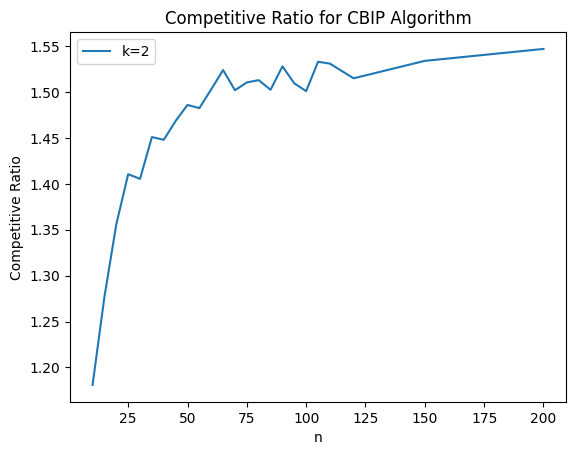

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
def graph(n, k):
        # Step 1: partition the vertices into k disjoint subsets
        value = random.random()
        p = value

        subsets = [[] for _ in range(k)]
        for i in range(n):
            subsets[i % k].append(i)

        # Step 2: generate edges between vertices in different subsets
        edges = set()
        for i in range(n):
            for j in range(i + 1, n):
                # newv = random.random()
                # print(newv)
                if i in subsets[j % k] or j in subsets[i % k]:
                    # vertices belong to the same subset, do nothing
                    continue
                elif random.random() < p:
                    # generate edge with probability p
                    edges.add((i, j))

        # Construct the graph as a dictionary of adjacency lists
        graph = {i: [] for i in range(n)}
        for u, v in edges:
            graph[u].append(v)
            graph[v].append(u)

        return graph


def bipartite_is(graph):
    i_set = set()
    i_set2 = set()
    visited = set()

    # LAST VERTEX ADD TO INDEPENDENT VERTEX 1
    st_v = len(list(graph.nodes())) - 1
    i_set.add(st_v)
    visited.add(st_v)

    # PERFORM BFS
    qu = [st_v]
    while qu:
        ver = qu.pop(0)
        for neighbor in graph[ver]:
            if neighbor not in visited:
                # add neighbor to the opposite independent set
                if ver in i_set:
                    i_set2.add(neighbor)
                else:
                    i_set.add(neighbor)
                visited.add(neighbor)
                qu.append(neighbor)

    # return the two independent sets
    return list(i_set), list(i_set2)



def CBIP(G):

  find_minimum_integer = lambda lst: next(i for i in range(1, len(lst) + 2) if i not in set(lst))
  G = nx.Graph(G)
  n = len(G.nodes())
  if n<1:
    return []
  #Color the first vertice 1 as our base case.
  color_list = [1]
  for i in range(1,n):
    other_part_colors = []
    other_part = bipartite_is(G.subgraph(range(i + 1)))[1]
    for j in other_part:
      other_part_colors.append(color_list[j])
    color = find_minimum_integer(other_part_colors)
    color_list.append(color)
  return color_list





# Run the FirstFit algorithm on the online graph and return the number of colors used

ratios = {2: []}
for k in [2]:
    for n in [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,120,150,200]:
        N = 100
        competitive_ratio_sum = 0
        
        for i in range(N):
            G = graph(n, k)
            x = CBIP(G)
            colors_used = len(set(x))
            optimal_colors = k
            competitive_ratio = colors_used / optimal_colors
            competitive_ratio_sum += competitive_ratio
        
        average_ratio = competitive_ratio_sum / N
        ratios[k].append(average_ratio)
        print(f"k={k}, n={n}, average ratio={average_ratio}")

for k in [2]:
    plt.plot([10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,120,150,200], ratios[k], label=f'k={k}')
    
plt.legend()
plt.title('Competitive Ratio for CBIP Algorithm')
plt.xlabel('n')
plt.ylabel('Competitive Ratio')
plt.show()


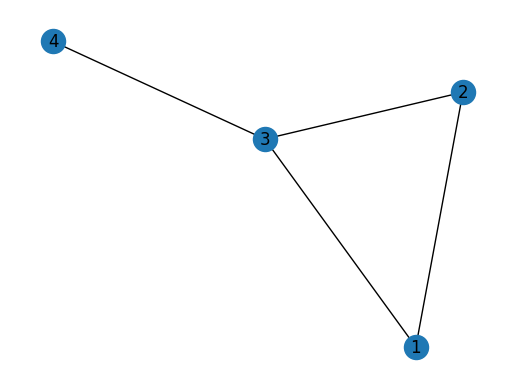

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# define the edges list
edges = [(1, 2), (1, 3), (2, 3), (3, 4)]

# create a new graph
G = nx.Graph()

# add the edges to the graph
G.add_edges_from(edges)

# create a new matplotlib figure and axis
fig, ax = plt.subplots()

# plot the graph
nx.draw(G, with_labels=True, ax=ax)

# display the plot
plt.show()
